Importing the Libraries

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D, Dropout
import matplotlib.pyplot as plt

Let's start by loading and examining the dataset.

The dataset consists of 6607 rows and 20 columns, with a mixture of numerical and categorical data. The target variable seems to be the `Exam_Score`, which is a numerical score we aim to predict.

Here is an outline of the columns:
- Numerical features: `Hours_Studied`, `Attendance`, `Sleep_Hours`, `Previous_Scores`, `Tutoring_Sessions`, `Physical_Activity`, `Exam_Score` (target variable).
- Categorical features: `Parental_Involvement`, `Access_to_Resources`, `Extracurricular_Activities`, etc.


In [16]:
# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

### 1. Preprocessing the data:
I'll now preprocess the data, encode the categorical features, and normalize the numerical ones. Then we'll reshape it for the CNN models.

The data has been reshaped to a 3D format suitable for CNNs, with the shape `(samples, features, 1)`:
- Training set: 5285 samples with 19 features.
- Test set: 1322 samples with 19 features.

Now, let's build and train two CNN models:

Since CNNs work best with spatially correlated data (such as images), applying them to numerical/categorical data requires transforming the data into a format that CNNs can handle. One way is by reshaping or representing the data in a "grid" format. Here's what we'll do:

### Steps:
1. **Preprocess the data**: 
   - Encode categorical variables.
   - Normalize numerical values.
   - Reshape the data to fit the CNN input format (we can treat this data as 1D "images").
   
2. **Build two CNN models**:
   - Model 1: A basic CNN with a few convolutional layers.
   - Model 2: A more complex CNN with additional layers.

3. **Train the models and evaluate their performance** (Accuracy, F1 Score, Precision).

4. **Visualize the results using Matplotlib**.

Let’s proceed with these steps:

In [17]:
# Encode categorical columns
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

df.fillna(df.median(), inplace=True)


In [18]:
# Encode categorical columns
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

df.fillna(df.median(), inplace=True)

# Normalize the numerical columns
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                  'Tutoring_Sessions', 'Physical_Activity']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### 2. Building two CNN models:
- **Model 1**: A simple CNN with one convolutional layer and a fully connected layer.
- **Model 2**: A deeper CNN with more convolutional layers and pooling layers for additional complexity.

In [19]:
# Define features and target
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to fit CNN input format
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define CNN Model 1
def create_model_1():
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(19, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Define CNN Model 2
def create_model_2():
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(19, 1)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Create instances of both models
model_1 = create_model_1()
model_2 = create_model_2()

# Train both models
history_1 = model_1.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=1)
history_2 = model_2.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=1)

c:\Users\Chimni\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2474.6089 - mae: 43.6819 - val_loss: 66.6994 - val_mae: 6.4257
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 61.0397 - mae: 6.1159 - val_loss: 49.9396 - val_mae: 5.5070
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 47.9480 - mae: 5.3479 - val_loss: 38.2112 - val_mae: 4.7959
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36.7296 - mae: 4.5933 - val_loss: 29.5906 - val_mae: 4.1714
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27.7793 - mae: 3.9843 - val_loss: 22.8525 - val_mae: 3.6021
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 22.0411 - mae: 3.4196 - val_loss: 17.6233 - val_mae: 3.1138
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16.2417 - mae: 2.8795 - val_loss: 13.9486 - val_mae: 2.7006
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.0091 - mae: 2.4866 - val_loss: 11.5059 - val_mae: 2.3804
Epoch 9/10
166/166 ━━━━━━━━━━━━━━━━━━

In [20]:
# Predictions
y_pred_1 = model_1.predict(X_test_cnn).flatten()
y_pred_2 = model_2.predict(X_test_cnn).flatten()

# Classification metrics (assuming rounding for classification)
y_pred_1_class = np.round(y_pred_1)
y_pred_2_class = np.round(y_pred_2)

# Accuracy, F1 Score, Precision
metrics = {
    'Model 1': {
        'Accuracy': accuracy_score(y_test, y_pred_1_class),
        'F1 Score': f1_score(y_test, y_pred_1_class, average='weighted'),
        'Precision': precision_score(y_test, y_pred_1_class, average='weighted')
    },
    'Model 2': {
        'Accuracy': accuracy_score(y_test, y_pred_2_class),
        'F1 Score': f1_score(y_test, y_pred_2_class, average='weighted'),
        'Precision': precision_score(y_test, y_pred_2_class, average='weighted')
    }
}

print(metrics)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
{'Model 1': {'Accuracy': 0.17397881996974282, 'F1 Score': 0.1742253384096623, 'Precision': 0.1750011778931154}, 'Model 2': {'Accuracy': 0.1550680786686838, 'F1 Score': 0.1497750609590399, 'Precision': 0.16408987657781668}}


c:\Users\Chimni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chimni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


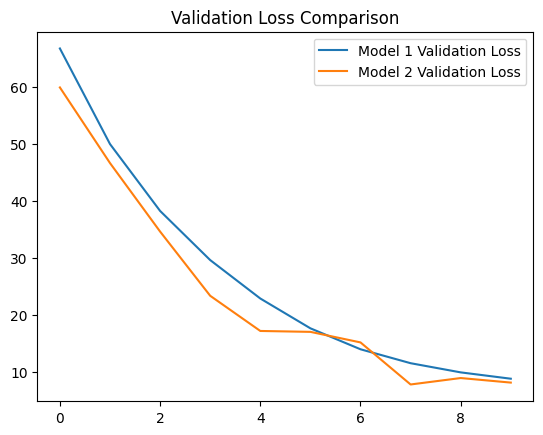

In [21]:
# Plotting results
plt.plot(history_1.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history_2.history['val_loss'], label='Model 2 Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()

### Explanation:
CNNs are typically designed for image processing tasks where the data has a clear spatial structure (e.g., pixels in a grid). When applying CNNs to numerical data, we reshape the input data into a 1D array with an extra dimension to mimic this spatial structure. Although CNNs might not be the most optimal choice for such tasks, they can still capture local dependencies in the data when applied to time-series or sequential data, which is somewhat analogous to our numerical features. 

In this case, each numerical feature could represent a "pixel," and the convolutional layers try to learn patterns across these features.